# EDA of Uttar Pradesh 2022 

* [myneta.info](https://myneta.info/)

## Visualizing data

In [57]:
import pandas as pd
import numpy as np
import matplotlib

%matplotlib inline

matplotlib.rc('figure', figsize=(10, 5))
matplotlib.rc('font', weight='bold', size=12)

In [58]:
data = pd.read_csv('up.csv')
data

,Candidate,Party,Criminal Cases,Education,Age,Constituency,Total Assets,Liabilities
0,Ali Khan,IND,1,10th Pass,31,Behat + Saharanpur,23542241,0
1,Dharam Pal Singh,IND,0,Graduate,46,Behat + Saharanpur,5565000,0
2,Mo. Ikram,IND,0,5th Pass,47,Behat + Saharanpur,2481845,200000
3,Naresh Saini,BJP,0,Post Graduate,57,Behat + Saharanpur,29506003,5779181
4,Poonam Kamboj,INC,0,Post Graduate,36,Behat + Saharanpur,13552777,1800000
...,...,...,...,...,...,...,...,...
4401,Manoj Kumar Chaubey,IND,2,Post Graduate,42,Sevapuri + Varanasi,2172346,0
4402,Neel Ratan Singh,BJP,2,12th Pass,50,Sevapuri + Varanasi,19373958,0
4403,Santosh,Moulik Adhikar Party,0,12th Pass,51,Sevapuri + Varanasi,12149100,258000
4404,Surendra,Jan Adhikar Party,2,Graduate,44,Sevapuri + Varanasi,24450000,1500000


In [59]:
data.describe()

,Criminal Cases,Age,Total Assets,Liabilities
count,4406.000000,4406.000000,4.406000e+03,4.406000e+03
mean,0.761008,45.750113,2.871756e+07,2.466444e+06
std,2.618772,11.525502,9.350072e+07,1.156151e+07
min,0.000000,25.000000,0.000000e+00,0.000000e+00
25%,0.000000,37.000000,1.171153e+06,0.000000e+00
50%,0.000000,45.000000,5.553000e+06,0.000000e+00
75%,1.000000,53.000000,2.232900e+07,8.110000e+05
max,87.000000,92.000000,2.968849e+09,3.012381e+08


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Candidate       4406 non-null   object
 1   Party           4406 non-null   object
 2   Criminal Cases  4406 non-null   int64 
 3   Education       4406 non-null   object
 4   Age             4406 non-null   int64 
 5   Constituency    4406 non-null   object
 6   Total Assets    4406 non-null   int64 
 7   Liabilities     4406 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 275.5+ KB


In [61]:
# Total number of Parties
np.size(data["Party"].unique()) - 1
# Reducing by one for independent candidates

285

In [62]:
candidates = np.size(data["Candidate"])
candidates

4406

In [63]:
candidates - np.size(data["Candidate"].unique())

703

In [64]:
candidates - data.groupby(['Candidate', 'Party']).ngroups

161

In [65]:
candidates - data.groupby(['Candidate', 'Constituency']).ngroups

10

In [66]:
data.groupby(['Candidate', 'Education'])['Total Assets'].sum().sort_values(ascending=False).head(25)

Candidate                  Education            
Nawab Kazim Ali Khan       Post Graduate            2968848840
Shah Alam (Guddu Jamali)   Post Graduate            1958570465
Supriya Aron               Post Graduate            1573049919
Amit Agarwal               Graduate Professional    1487664557
Devender Nagpal            Graduate                 1407648765
S.K.Sharma                 12th Pass                1122970707
Rahul Yadav                Others                   1006302500
Kunal Singh                Graduate Professional     880892909
Sahender Singh Ramala      10th Pass                 845070499
Rais Ahmad                 Graduate                  730221928
Yashpal Singh Yadav        Post Graduate             707404691
Ajay Kapoor                Graduate                  694617271
Vinay Shankar              Graduate Professional     675228964
Rakesh Pandey              8th Pass                  634647716
Kartar Singh Bhadana       8th Pass                  608746125
Mohd N

In [67]:
data.groupby(['Candidate', 'Education'])['Liabilities'].sum().sort_values(ascending=False).head(25)

Candidate                          Education            
Kunal Singh                        Graduate Professional    301238121
Rakesh Pandey                      8th Pass                 232288591
Devender Nagpal                    Graduate                 214852017
Dr. Raj Kumar Singh Gautam         Doctorate                174701582
Shahana Siddiqui                   8th Pass                 172943000
Yashpal Singh Yadav                Post Graduate            133863643
Amit Agarwal                       Graduate Professional    132973889
Umashankar Singh                   12th Pass                130235095
Vikas Gupta                        Post Graduate            123191949
Omkumar                            12th Pass                121649591
Sahender Singh Ramala              10th Pass                111385036
Subhash Passi                      10th Pass                101500000
Rajesh Kumar                       Post Graduate            101071878
Ajay Kapoor                      

In [68]:
party_data = data[data["Party"].isin(["AAP","AIMIM","BSP","BJP","INC","IND","SP","JDU","RLD"])]
party_data.reset_index()
party_data

,Candidate,Party,Criminal Cases,Education,Age,Constituency,Total Assets,Liabilities
0,Ali Khan,IND,1,10th Pass,31,Behat + Saharanpur,23542241,0
1,Dharam Pal Singh,IND,0,Graduate,46,Behat + Saharanpur,5565000,0
2,Mo. Ikram,IND,0,5th Pass,47,Behat + Saharanpur,2481845,200000
3,Naresh Saini,BJP,0,Post Graduate,57,Behat + Saharanpur,29506003,5779181
4,Poonam Kamboj,INC,0,Post Graduate,36,Behat + Saharanpur,13552777,1800000
...,...,...,...,...,...,...,...,...
4397,Arvind Kumar Tripathi,BSP,0,Graduate Professional,54,Sevapuri + Varanasi,85557041,14356147
4400,Kailash Patel,AAP,1,12th Pass,57,Sevapuri + Varanasi,26566854,0
4401,Manoj Kumar Chaubey,IND,2,Post Graduate,42,Sevapuri + Varanasi,2172346,0
4402,Neel Ratan Singh,BJP,2,12th Pass,50,Sevapuri + Varanasi,19373958,0


In [69]:
party_sorted = party_data[["Party","Candidate"]].groupby(["Party"]).aggregate(lambda x: len(x.unique())).sort_values(["Candidate"], ascending = False )
party_sorteds

NameError: name 'party_sorteds' is not defined

In [ ]:
party_sorted.plot(kind="bar")

In [ ]:
ed_data = pd.pivot_table(data,values=["Candidate"],aggfunc=lambda x: len(x.unique()), index=["Education"]).sort_values(["Candidate"], ascending = False )
ed_data.reset_index()
ed_data.plot(kind="bar")

In [ ]:
ed_party_data = pd.pivot_table(party_data, values=["Candidate"],aggfunc=lambda x: len(x.unique()), index=["Education"], columns=["Party"])
ed_party_data.fillna(0)

In [ ]:
criminal_data_asc = data[["Candidate","Constituency","Party", "Education","Criminal Cases"]].sort_values('Criminal Cases', ascending=False).head(25)
criminal_data_asc = criminal_data_asc.reset_index(drop=True)
criminal_data_asc

In [70]:
criminal_data_dsc = data[["Candidate","Constituency","Party", "Education","Criminal Cases"]].sort_values('Criminal Cases', ascending=True).head(25)
criminal_data_dsc = criminal_data_dsc.reset_index(drop=True)
criminal_data_dsc

,Candidate,Constituency,Party,Education,Criminal Cases
0,Ramkhiladi,Gunnaur + Sambhal,IND,Graduate,0
1,Ravindra Kumar,Madhaugarh + Jalaun,IND,12th Pass,0
2,Sheetal Kushwaha,Madhaugarh + Jalaun,BSP,Post Graduate,0
3,Siddarth Devolia,Madhaugarh + Jalaun,INC,Graduate Professional,0
4,Suresh Babu,Madhaugarh + Jalaun,IND,10th Pass,0
5,Ainul Hasan Mansoori,Kalpi + Jalaun,IND,10th Pass,0
6,Anjana Devi,Kalpi + Jalaun,IND,Literate,0
7,Santosh Kumar,Koraon (Sc) + Prayagraj,Sanatan Sanskriti Raksha Dal,12th Pass,0
8,Raj Mani,Koraon (Sc) + Prayagraj,BJP,Post Graduate,0
9,Jishan,Kalpi + Jalaun,Jan Adhikar Party,12th Pass,0


<AxesSubplot:xlabel='Party'>

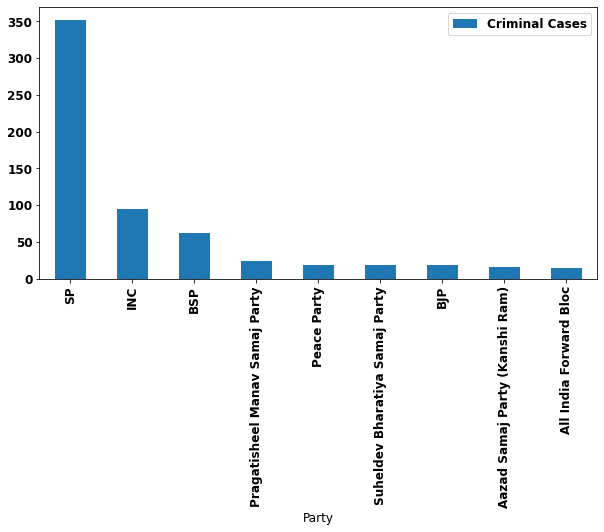

In [71]:
criminal_data_asc.groupby("Party").aggregate(np.sum).sort_values("Criminal Cases",ascending=False).head(25).plot(kind='bar') 

In [72]:
asset_data = data[["Candidate","Constituency","Party", "Total Assets"]].sort_values('Total Assets', ascending=False).head(25)
asset_data = asset_data.reset_index(drop=True)
asset_data

,Candidate,Constituency,Party,Total Assets
0,Nawab Kazim Ali Khan,Rampur + Rampur,INC,2968848840
1,Shah Alam (Guddu Jamali),Mubarakpur + Azamgarh,All India Majlis-E-Ittehadul Muslimeen,1958570465
2,Supriya Aron,Bareilly Cantt. + Bareilly,SP,1573049919
3,Amit Agarwal,Meerut Cantt. + Meerut,BJP,1487664557
4,Devender Nagpal,Naugawan Sadat + Amroha,BJP,1407648765
5,S.K.Sharma,Mathura + Mathura,BSP,1122970707
6,Rahul Yadav,Sikandrabad + Bulandsahar,SP,1006302500
7,Kunal Singh,Sahaswan + Budaun,Rashtriya Parivartan Dal,880892909
8,Sahender Singh Ramala,Chhaprauli + Baghpat,BJP,845070499
9,Rais Ahmad,Badaun + Budaun,SP,730221928


<AxesSubplot:xlabel='Party'>

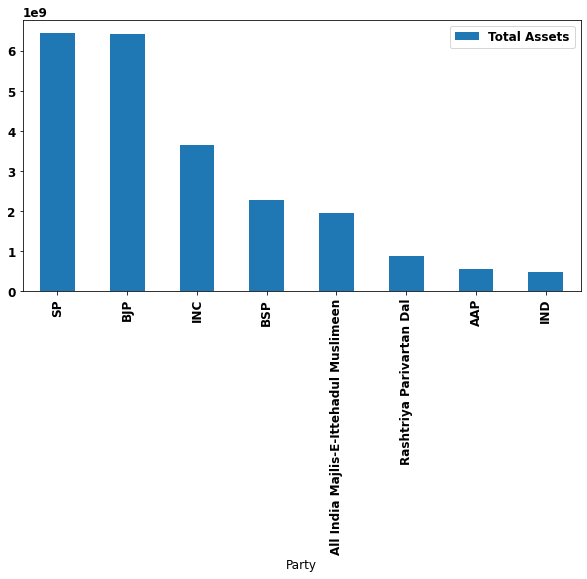

In [73]:
asset_data.groupby("Party").aggregate(np.sum).sort_values("Total Assets",ascending=False).head(25).plot(kind='bar') 